In [4]:
import pandas as pd          
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
import matplotlib
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
from math import sqrt
from sklearn.metrics import mean_squared_error
from numpy import array

#Reading Data
df = pd.read_excel('Merged_pollution_dataset - wo 2016 17.xlsx')
df_bbsr = df[(df['City/Town/Village/Area'] == 'Bhubaneswar') | (df['City/Town/Village/Area'] == 'Bhubaneshwar')]

df_bbsr.dtypes

df_bbsr['RSPM/PM10'] = pd.to_numeric(df_bbsr['RSPM/PM10'], errors='coerce')
df_bbsr['SO2'] = pd.to_numeric(df_bbsr['SO2'], errors='coerce')
df_bbsr['NO2'] = pd.to_numeric(df_bbsr['NO2'], errors='coerce')
df_bbsr['SPM'] = pd.to_numeric(df_bbsr['NO2'], errors='coerce')

df_bbsr.dtypes

#Data Preprocessing
df_bbsr['Location of Monitoring Station'].replace('SPCB Building, Bhubaneshwar', 'OSPCB Bldg',inplace=True)
df_bbsr['Location of Monitoring Station'].replace('Capital Police Station, Bhubaneshwar', 'Capital Police Stn.',inplace=True)
df_bbsr['Location of Monitoring Station'].replace('IRC Vilage, Bhubaneshwar', 'IRC',inplace=True)
df_bbsr['Location of Monitoring Station'].replace('Chandrasekharpur. Bhubneswar', 'Chandrasekharpur',inplace=True)
df_bbsr['Location of Monitoring Station'].replace('Water works, Palasuni, Bhubneswar', 'Palasuni',inplace=True)
df_bbsr['Location of Monitoring Station'].replace('Patrapada, Bhubneswar', 'Patrapada',inplace=True)

df_bbsr_irc = df_bbsr[(df_bbsr['Location of Monitoring Station'] == 'IRC')]

#Initial Analysis
#Checking the datatypes of various columns
df_bbsr_irc.dtypes

#Converting object to Datetime
df_bbsr_irc.reset_index(inplace = True)
df_bbsr_irc = df_bbsr_irc.drop(['index'], axis = 1)
df_bbsr_irc['Sampling Date'] = pd.to_datetime(df_bbsr_irc['Sampling Date'], format='%Y-%m-%d %H:%M')
df_bbsr_irc['Sampling Date'] = pd.to_datetime(df_bbsr_irc['Sampling Date'], format='%Y-%m-%d %H:%M')


df_bbsr_irc.dtypes

#Setting default Plot Size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,8

print("SUCCESS!!")
df_bbsr_irc.head()

SUCCESS!!


,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,SPM
0,NaN,2005-01-01,Orissa,Bhubaneshwar,IRC,Odisha State Pollution Control Board,Residential and others,NaN,14.0,98.0,14.0
1,NaN,2005-05-01,Orissa,Bhubaneshwar,IRC,Odisha State Pollution Control Board,Residential and others,NaN,27.0,130.0,27.0
2,NaN,2005-07-01,Orissa,Bhubaneshwar,IRC,Odisha State Pollution Control Board,Residential and others,NaN,24.0,183.0,24.0
3,NaN,2005-11-01,Orissa,Bhubaneshwar,IRC,Odisha State Pollution Control Board,Residential and others,NaN,NaN,85.0,NaN
4,NaN,2005-01-13,Orissa,Bhubaneshwar,IRC,Odisha State Pollution Control Board,Residential and others,NaN,11.0,102.0,11.0


In [5]:
#Index Sorting
df_bbsr_irc = df_bbsr_irc.set_index(df_bbsr_irc['Sampling Date'])
df_bbsr_irc = df_bbsr_irc.sort_index()
# plt.plot(df_bbsr_cps['NO2'])

#Separating Year, Month, Day and Day of Week
df_bbsr_irc['year'] = df_bbsr_irc['Sampling Date'].dt.year 
df_bbsr_irc['month'] = df_bbsr_irc['Sampling Date'].dt.month 
df_bbsr_irc['day'] = df_bbsr_irc['Sampling Date'].dt.day
df_bbsr_irc['day_of_week'] = df_bbsr_irc['Sampling Date'].dt.dayofweek

#Determining Weekend
def weekend(row):
    if (row == 5) or (row == 6):
        return 1
    else:
        return 0

df_bbsr_irc['weekend'] = df_bbsr_irc['day_of_week'].apply(weekend)

#Outlier Removal
mean_irc = df_bbsr_irc['SPM'].mean()
std_dev_irc = df_bbsr_irc['SPM'].std() #Standard Deviation of SPM

df_bbsr_irc['SPM'][df_bbsr_irc['SPM'] > (mean_irc + 2.5*std_dev_irc)] = np.nan   #Replacing Outlier with "nan"
plt.plot(df_bbsr_irc['SPM'])
df_bbsr_irc.isna().sum()

df_bbsr_irc['SPM'] = df_bbsr_irc['SPM'].fillna(method = 'backfill')   #Replacing "nan" with the previous values

#Dummy Encoding
df_bbsr_irc = pd.get_dummies( df_bbsr_irc, columns = ['month', 'day_of_week'] )

print("SUCCESS!!")

SUCCESS!!


In [6]:
#Creating Multi-features
xf = df_bbsr_irc[['weekend', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'SPM']]

xf.head()


,weekend,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,SPM
Sampling Date,,,,,,,,,,,,,,,,,,,,,
2005-01-01,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,14.0
2005-01-02,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,19.0
2005-01-03,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,19.0
2005-01-08,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,15.0
2005-01-13,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,11.0


In [7]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)


# choose a number of time steps
n_steps_in, n_steps_out = 100, 21

mean_spm = xf['SPM'].mean()
std_spm = xf['SPM'].std()

#Feature Scaling
cols = ['weekend', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'SPM']

for field in cols:
    xf[field] = (xf[field] - xf[field].mean())/xf[field].std()


X, y = split_sequences(xf.values, n_steps_in, n_steps_out)

X_test, y_test = X[-1], y[-1]

X = np.delete(X, X.shape[0] - 1, 0)
y = np.delete(y, y.shape[0] - 1, 0)

# X = X.reshape(X.shape[0], X.shape[1], 1)
# y = y.reshape(y.shape[0], y.shape[1], 1)

n_features = X.shape[2]

print("SUCCESS!!")

SUCCESS!!


In [11]:
%tensorflow_version 1.x
from keras import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import LSTM
# from keras.layers import GRU
from keras.layers.normalization import BatchNormalization
from keras.layers import Bidirectional


model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(n_steps_in, n_features)))
model.add(MaxPooling1D(pool_size=2))
# model.add(BatchNormalization())

model.add(Conv1D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# model.add(Flatten())
# model.add(Dense(50, activation='relu'))
model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

print('SUCCESS!!')

SUCCESS!!


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [13]:
from tensorflow.python.keras.callbacks import EarlyStopping

monitor = EarlyStopping(monitor='loss', min_delta=1e-3, patience=50, verbose=1, mode='auto',
        restore_best_weights=True)
model.fit(X, y, callbacks=[monitor], verbose=2, epochs=2000)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/2000





 - 5s - loss: 1.0019
Epoch 2/2000
 - 2s - loss: 0.8937
Epoch 3/2000
 - 2s - loss: 0.7757
Epoch 4/2000
 - 2s - loss: 0.6957
Epoch 5/2000
 - 2s - loss: 0.6766
Epoch 6/2000
 - 2s - loss: 0.6639
Epoch 7/2000
 - 2s - loss: 0.6599
Epoch 8/2000
 - 2s - loss: 0.6512
Epoch 9/2000
 - 2s - loss: 0.6481
Epoch 10/2000
 - 2s - loss: 0.6429
Epoch 11/2000
 - 2s - loss: 0.6394
Epoch 12/2000
 - 2s - loss: 0.6364
Epoch 13/2000
 - 2s - loss: 0.6349
Epoch 14/2000
 - 2s - loss: 0.6330
Epoch 15/2000
 - 2s - loss: 0.6313
Epoch 16/2000
 - 2s - loss: 0.6296
Epoch 17/2000
 - 2s - loss: 0.6267
Epoch 18/2000
 - 2s - loss: 0.6258
Epoch 19/2000
 - 2s - loss: 0.6237
Epoch 20/2000
 - 2s - loss: 0.6200
Epoch 21/2000
 - 2s - loss: 0.6183
Epoch 22/2000
 - 2s - loss: 0.6147
Epoch 23/2000
 - 2s - loss: 0.6117
Epoch 24/2000
 - 2s - loss: 0.6096
Epoch 25/2000
 - 2s - loss: 0.6041
Epoch 26/2000
 - 2s - loss: 0.59

In [14]:
from sklearn.externals import joblib 
path = "/content/drive/My Drive/model_cnnbilstm_spm_IRC.pkl"  
# Save the model as a pickle in a file 
joblib.dump(model, path)

['/content/drive/My Drive/model_cnnbilstm_spm_IRC.pkl']

In [8]:
from sklearn.externals import joblib
model = joblib.load('F:\Weather Forecasting\Swastik_project\Models\model_cnnbilstm_spm_IRC.pkl')

Using TensorFlow backend.


In [9]:
x_input = array(X_test)
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=2)
print((yhat[0]*std_spm)+mean_spm)
print((y_test*std_spm)+mean_spm)

[ 15.77465057  21.33368111  16.45056343  20.60182381  12.45544529
  19.77458382  15.63081741  17.59766197  20.32873344  18.23159599
  17.82210541  19.33264542  18.20191193  19.23058319  17.07241249
  16.98010826  19.86132431  21.42939758  15.96133327  19.78939056
  18.43794632]
[ 16.  16.  17.  18.  18.  17.  19.  17.  18.  18.  20.  20.  18.  18.  19.
  20.  17.  17.  17.  18.  17.]


In [10]:
X_test.shape

(100, 20)

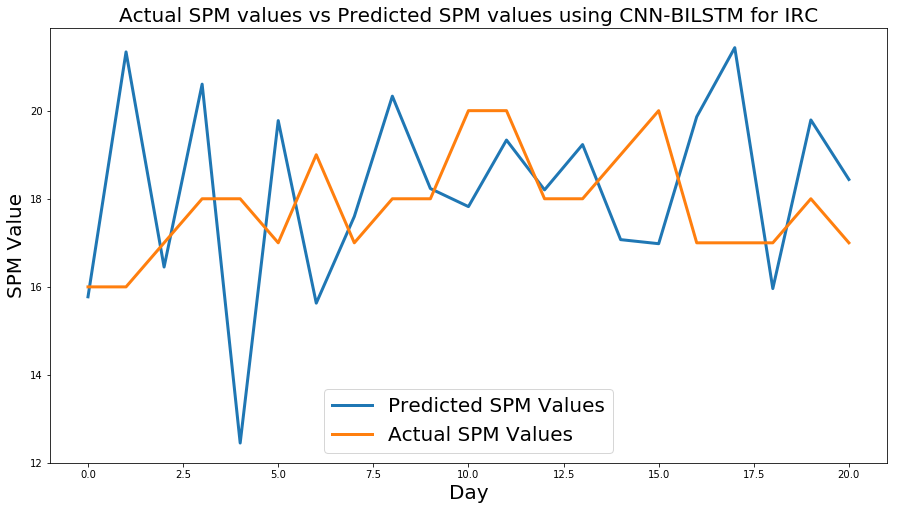

In [12]:
# fig, ax = plt.subplots()
plt.title('Actual SPM values vs Predicted SPM values using CNN-BILSTM for IRC', fontsize = 20)
plt.xlabel('Day', fontsize = 20)
plt.ylabel('SPM Value', fontsize = 20)
plt.plot((yhat[0]*std_spm)+mean_spm, label = 'Predicted SPM Values', linewidth=3)
plt.plot((y_test*std_spm)+mean_spm, label = 'Actual SPM Values',  linewidth=3)
plt.legend(loc = 'lower center',frameon=True,  prop={"size":20});
plt.show()

In [13]:
x_new = []

for inp_val in X:
  x_input_new = inp_val.reshape((1, n_steps_in, n_features))
  y_newpred = model.predict(x_input_new, verbose = 1)
  x_new.append(y_newpred)
  
x_new = array(x_new)

1/1 [==============================] - 0s 8ms/step


In [14]:
x_new1 = x_new[:, 0, :]
x_new1.shape

(789, 21)

In [15]:
print(x_new1.shape, y.shape)

(789, 21) (789, 21)


In [16]:
# from sklearn import svm
# from sklearn.svm import SVR

# svc = svm.SVC(kernel ='linear', C = 1).fit(x_ann_new, y)

# clf = SVR(C=1.0, epsilon=0.2)
# model_new = clf.fit(x_ann_new, y[:,0])

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# regr_multirf = MultiOutputRegressor(SVR(kernel='rbf'))

regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, max_depth=30, random_state=0))
regr_multirf.fit(x_new1, y)

MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
           n_jobs=1)

In [15]:
from sklearn.externals import joblib 
path = "F:\Weather Forecasting\Swastik_project\Models\model_cnnbilstm_RFRegressor_IRC.pkl"  
# Save the model as a pickle in a file 
joblib.dump(regr_multirf, path)

['F:\\Weather Forecasting\\Swastik_project\\Models\\model_cnnbilstm_RFRegressor_IRC.pkl']

In [16]:
regr_multirf = joblib.load('F:\Weather Forecasting\Swastik_project\Models\model_cnnbilstm_RFRegressor_IRC.pkl')

In [17]:
y_test.shape
y_test_new = y_test.reshape(y_test.shape[0], -1)

y_test_new.shape
y_test

array([ 0.03706463,  0.03706463,  0.2830197 ,  0.52897478,  0.52897478,
        0.2830197 ,  0.77492986,  0.2830197 ,  0.52897478,  0.52897478,
        1.02088493,  1.02088493,  0.52897478,  0.52897478,  0.77492986,
        1.02088493,  0.2830197 ,  0.2830197 ,  0.2830197 ,  0.52897478,
        0.2830197 ])

In [18]:
y_test_new = y_test_new.T
y_test_new

array([[ 0.03706463,  0.03706463,  0.2830197 ,  0.52897478,  0.52897478,
         0.2830197 ,  0.77492986,  0.2830197 ,  0.52897478,  0.52897478,
         1.02088493,  1.02088493,  0.52897478,  0.52897478,  0.77492986,
         1.02088493,  0.2830197 ,  0.2830197 ,  0.2830197 ,  0.52897478,
         0.2830197 ]])

In [19]:
yhat_new = regr_multirf.predict(y_test_new)

In [20]:
print(yhat_new)
print(y_test_new)

[[ 0.04415633  0.03054682  0.24358491  0.52741707  0.60743445  0.26629476
   0.85490625  0.32720963  0.57591121  0.55635778  1.01629377  1.00321716
   0.49974712  0.4921635   0.72299234  1.02461525  0.28474139  0.36356999
   0.30408986  0.52745806  0.2989248 ]]
[[ 0.03706463  0.03706463  0.2830197   0.52897478  0.52897478  0.2830197
   0.77492986  0.2830197   0.52897478  0.52897478  1.02088493  1.02088493
   0.52897478  0.52897478  0.77492986  1.02088493  0.2830197   0.2830197
   0.2830197   0.52897478  0.2830197 ]]


In [21]:
#Denormalization
y_test_new = (y_test_new[0]*std_spm)+mean_spm 
yhat_new = (yhat_new[0]*std_spm)+mean_spm

In [22]:
print(yhat_new)
print(y_test_new)

[ 16.02883333  15.9735      16.83966667  17.99366667  18.319       16.932
  19.32516667  17.17966667  18.19083333  18.11133333  19.98133333
  19.92816667  17.88116667  17.85033333  18.78883333  20.01516667  17.007
  17.3275      17.08566667  17.99383333  17.06466667]
[ 16.  16.  17.  18.  18.  17.  19.  17.  18.  18.  20.  20.  18.  18.  19.
  20.  17.  17.  17.  18.  17.]


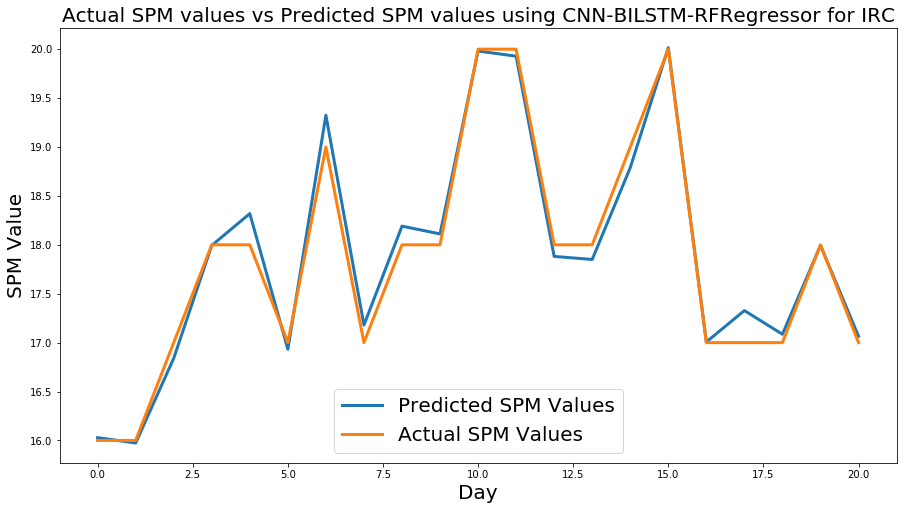

In [23]:
# fig, ax = plt.subplots()
plt.title('Actual SPM values vs Predicted SPM values using CNN-BILSTM-RFRegressor for IRC', fontsize = 20)
plt.xlabel('Day', fontsize = 20)
plt.ylabel('SPM Value', fontsize = 20)
plt.plot((yhat_new), label = 'Predicted SPM Values', linewidth=3)
plt.plot((y_test_new), label = 'Actual SPM Values', linewidth=3)
plt.legend(loc = 'lower center',frameon=True,  prop={"size":20});
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
def mean_absolute_percentage_error(y_true, y_pred): 
    # y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


rms_new = sqrt(mean_squared_error(y_test_new, yhat_new))
print(rms_new)

mse_new = mean_squared_error(y_test_new, yhat_new)
print(mse_new)

mae_new = mean_absolute_error(y_test_new, yhat_new)
print(mae_new)

mape_new = mean_absolute_percentage_error(y_test_new, yhat_new)
print(mape_new)

0.15829547577273675
0.0250574576501
0.118682539648
0.664808166701


In [25]:
import csv
with open('cnn_bilstm_rfregressor_irc.csv', 'w', newline='') as file:
    writer = csv.writer(file, delimiter = ',')
    writer.writerow(y_test_new)
    writer.writerow(yhat_new)